In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [2]:
three_county_df = pd.read_excel('../data/suicide_occurances_15_19_edited.xlsx', index_col=0)
us_mortality_df = pd.read_csv('../data/NCHS_Injury_Mortality_United_States.csv')
co_county_df = pd.read_csv('../data/Suicide_Mortality_Rate_CO_Counties_.csv')

In [3]:
us_mortality_df.describe()

,Year,Deaths,Population,Age Specific Rate,Age Specific Rate Standard Error,Age Specific Rate Lower Confidence Limit,Age Specific Rate Upper Confidence Limit
count,98280.000000,98280.000000,9.828000e+04,98280.000000,80093.000000,98280.000000,98280.000000
mean,2007.500000,1030.300346,2.792145e+07,4.144323,0.178736,3.872784,4.461783
std,5.188154,5654.431217,4.615604e+07,14.839778,0.385711,14.386794,15.305750
min,1999.000000,0.000000,2.381630e+05,0.000000,0.000311,0.000000,0.000000
25%,2003.000000,2.000000,4.841440e+06,0.018200,0.022286,0.002576,0.050011
50%,2007.500000,26.000000,1.204773e+07,0.244084,0.061702,0.145650,0.396250
75%,2012.000000,235.000000,2.956510e+07,1.828186,0.169559,1.546272,2.166448
max,2016.000000,231991.000000,3.231275e+08,283.918310,8.270687,279.858790,287.977830


In [4]:
us_mortality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98280 entries, 0 to 98279
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Year                                      98280 non-null  int64  
 1   Sex                                       98280 non-null  object 
 2   Age Group (Years)                         98280 non-null  object 
 3   Race                                      98280 non-null  object 
 4   Injury Mechanism                          98280 non-null  object 
 5   Injury Intent                             98280 non-null  object 
 6   Deaths                                    98280 non-null  int64  
 7   Population                                98280 non-null  int64  
 8   Age Specific Rate                         98280 non-null  float64
 9   Age Specific Rate Standard Error          80093 non-null  float64
 10  Age Specific Rate Lower Confidence

In [5]:
us_mortality_df['Injury Intent'].unique()

array(['All Intentions', 'Suicide', 'Unintentional', 'Undetermined',
       'Homicide', 'Legal intervention/war'], dtype=object)

In [6]:
us_suicide_df = us_mortality_df[us_mortality_df['Injury Intent'] == 'Suicide']
us_suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16632 entries, 334 to 93743
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Year                                      16632 non-null  int64  
 1   Sex                                       16632 non-null  object 
 2   Age Group (Years)                         16632 non-null  object 
 3   Race                                      16632 non-null  object 
 4   Injury Mechanism                          16632 non-null  object 
 5   Injury Intent                             16632 non-null  object 
 6   Deaths                                    16632 non-null  int64  
 7   Population                                16632 non-null  int64  
 8   Age Specific Rate                         16632 non-null  float64
 9   Age Specific Rate Standard Error          14232 non-null  float64
 10  Age Specific Rate Lower Confiden

In [9]:
#us_suicide_df['Year'][:20]
#us_suicide_df['Age Group (Years)'].unique()
us_suicide_df.tail

<bound method NDFrame.tail of        Year         Sex Age Group (Years)       Race Injury Mechanism  \
334    1999  Both sexes              < 15  All races   All Mechanisms   
508    2013        Male              < 15  All races   All Mechanisms   
985    2012        Male              < 15  All races   All Mechanisms   
1322   2009  Both sexes              < 15  All races       Cut/pierce   
1455   2011        Male              < 15  All races       Cut/pierce   
...     ...         ...               ...        ...              ...   
93739  2003      Female               75+   Hispanic      Unspecified   
93740  2002      Female               75+   Hispanic      Unspecified   
93741  2001      Female               75+   Hispanic      Unspecified   
93742  2000      Female               75+   Hispanic      Unspecified   
93743  1999      Female               75+   Hispanic      Unspecified   

      Injury Intent  Deaths  Population  Age Specific Rate  \
334         Suicide     244    

In [8]:
us_suicide_df['Year'].unique()

array([1999, 2013, 2012, 2009, 2011, 2010, 2008, 2016, 2015, 2014, 2007,
       2006, 2005, 2004, 2003, 2002, 2001, 2000])

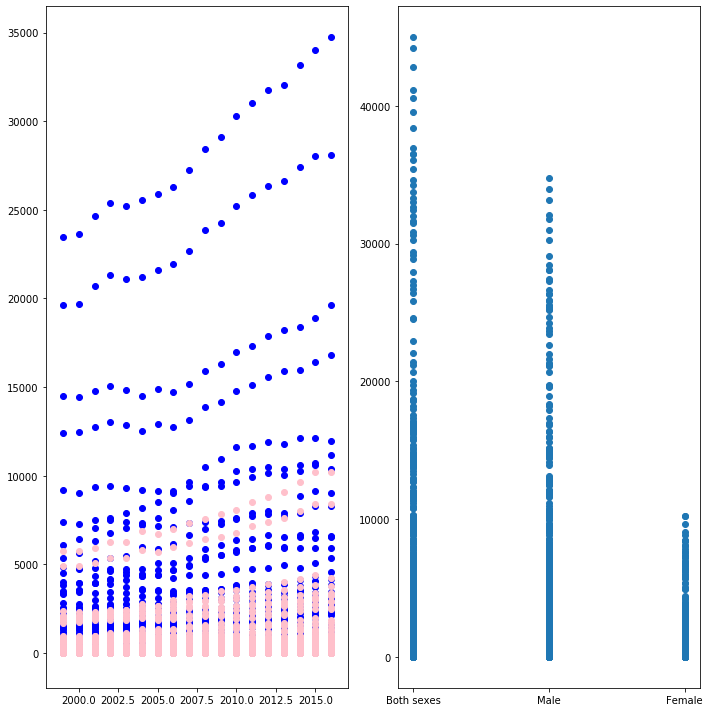

In [7]:
us_suicide_m_df = us_suicide_df[us_suicide_df['Sex'] == 'Male']
us_suicide_fm_df = us_suicide_df[us_suicide_df['Sex'] == 'Female']

fig, axs = plt.subplots(1,2, figsize=(10,10))
axs[0].scatter(us_suicide_m_df['Year'], us_suicide_m_df['Deaths'], c='blue')
axs[0].scatter(us_suicide_fm_df['Year'], us_suicide_fm_df['Deaths'], c='pink')
axs[1].scatter(us_suicide_df['Sex'], us_suicide_df['Deaths'])

plt.tight_layout()

In [13]:
year_labels = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2000', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
mens = us_suicide_m_df['']
us_suicide_fm_df

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

<bound method Series.unique of 0        2016
1        2015
2        2014
3        2013
4        2012
         ... 
98275    2003
98276    2002
98277    2001
98278    2000
98279    1999
Name: Year, Length: 98280, dtype: int64>